## Actividad 10 pto 10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Curves2D
from matplotlib import colors
import matplotlib.ticker as ticker

In [2]:
# Tamaño de visualización de los DataFrame

pd.options.display.max_rows = 80
pd.options.display.max_columns = 50

# Escribimos en latex

plt.rcParams['text.usetex'] = False

In [3]:
np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Descargamos los datos de las galaxias post y pre mergers

In [4]:
# Importamos las tablas con la información pre y post merger de las galaxias 

In [5]:
path ='/home/ramiro/Facultad/Tesis/Datos/Actividad 10/'

In [6]:
SUB = pd.read_csv(path+'Subhalo_maxmergers(todo>0.01).dat')
SIZ = pd.read_csv(path+'Sizes_maxmergers(todo>0.01).dat')
MOR = pd.read_csv(path+'MorphoKinem_maxmergers(todo>0.01).dat')
FOF = pd.read_csv(path+'FOF_maxmergers(todo>0.01).dat')

In [7]:
SIZ = SIZ.drop_duplicates()
MOR = MOR.drop_duplicates()
FOF = FOF.drop_duplicates()

In [8]:
# Armo un dataframe con las variables que usamos para graficar las galaxias que sufrieron mergers
VAR_SUB = pd.DataFrame(columns=['GalaxyID','GroupID','DescendantID','Lm','SnapNum','Redshift','SubGroupNumber','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)','Log(Stars_Metallicity/Z_sun)',
                                '12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)','Log(StarFormationRate)',
                                'Log(StarFormationRate/Stars_Mass)','Log(BlackHoleMass)'])

VAR_SUB['GalaxyID'] = SUB['GalaxyID']
VAR_SUB['DescendantID'] = SUB['DescendantID']
VAR_SUB['GroupID'] = SUB['GroupID']
VAR_SUB['Lm'] = SUB['Lm_max']
VAR_SUB['SnapNum']=SUB['SnapNum']
VAR_SUB['Redshift']=SUB['Redshift']
VAR_SUB['SubGroupNumber'] = SUB['SubGroupNumber']
VAR_SUB['Log(Stars_Mass)'] = np.log10(SUB['Stars_Mass'])
VAR_SUB['Log(SF_Mass+Stars_Mass)'] = np.log10(SUB['SF_Mass']+SUB['Stars_Mass'])
VAR_SUB['Log(Stars_Metallicity/Z_sun)'] = np.log10(SUB['Stars_Metallicity'])-np.log10(0.02)
VAR_SUB['12+Log(O/H)'] = 12+np.log10(SUB['SF_Oxygen']/SUB['SF_Hydrogen'])-np.log10(16)
VAR_SUB['SF_Mass/(SF_Mass+Stars_Mass)'] = SUB['SF_Mass']/(SUB['SF_Mass']+SUB['Stars_Mass'])
VAR_SUB['Log(StarFormationRate)'] = np.log10(SUB['StarFormationRate'])
VAR_SUB['Log(StarFormationRate/Stars_Mass)'] = np.log10(SUB['StarFormationRate'])-np.log10(SUB['Stars_Mass'])
VAR_SUB['Log(BlackHoleMass)'] = np.log10(SUB['BlackHoleMass'])

In [9]:
VAR_MOR = pd.merge(VAR_SUB,MOR)
VAR_SIZ = pd.merge(VAR_SUB,SIZ)
VAR_FOF = pd.merge(VAR_SUB,FOF)

In [10]:
# Tabla con nuestras variables para las galaxias que sufrieron mergers(para todas las galaxias).

dif_Log_SMs           = np.array([])
dif_Log_SF_SMs        = np.array([])
dif_Log_S_MetZ        = np.array([])
dif_Log_OH            = np.array([])
dif_SFfrac            = np.array([])
dif_Log_SFR           = np.array([])
dif_Log_sSFR          = np.array([])
dif_Log_BH            = np.array([])
dif_RHM30             = np.array([])
dif_KcRot             = np.array([])
L_merger_sub          = np.array([])
Log_Star_mass_pre_sub = np.array([])
Red_merger_sub        = np.array([])
L_merger_siz          = np.array([])
Log_Star_mass_pre_siz = np.array([])
Red_merger_siz        = np.array([])
L_merger_mor          = np.array([])
Log_Star_mass_pre_mor = np.array([])
Red_merger_mor        = np.array([])

for i in np.arange(0,int(len(VAR_SUB))-1):
    
    mask_ID = (VAR_SUB['Lm'] <= 5)&(VAR_SUB['SnapNum']>=4)&(VAR_SUB['Lm'] == VAR_SUB['Lm'].iloc[i+1])&((VAR_SUB['DescendantID'] == VAR_SUB['GalaxyID'].iloc[i+1])|(VAR_SUB['GalaxyID'] == VAR_SUB['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_SUB[mask_ID])==int(2):
        
        dif_Log_SMs   =np.append(dif_Log_SMs,VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[0])
        dif_Log_SF_SMs=np.append(dif_Log_SF_SMs,VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[0])
        dif_Log_S_MetZ=np.append(dif_Log_S_MetZ,VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[1]-VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[0])
        dif_Log_OH    =np.append(dif_Log_OH,VAR_SUB[mask_ID]['12+Log(O/H)'].values[1]-VAR_SUB[mask_ID]['12+Log(O/H)'].values[0])
        dif_SFfrac    =np.append(dif_SFfrac,VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[0])
        dif_Log_SFR   =np.append(dif_Log_SFR,VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[1]-VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[0])
        dif_Log_sSFR  =np.append(dif_Log_sSFR,VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[1]-VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[0])
        dif_Log_BH    =np.append(dif_Log_BH,VAR_SUB[mask_ID]['Log(BlackHoleMass)'].values[1]-VAR_SUB[mask_ID]['Log(BlackHoleMass)'].values[0])
        # Nos guardamos Log(star Mass) pre merer, SanpNum y L_merger.
        L_merger_sub  =np.append(L_merger_sub,VAR_SUB[mask_ID]['Lm'].values[0])
        Log_Star_mass_pre_sub=np.append(Log_Star_mass_pre_sub,VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[1])
        Red_merger_sub=np.append(Red_merger_sub,VAR_SUB[mask_ID]['Redshift'].values[1])
    
for i in np.arange(0,len(VAR_SIZ)-1):
    
    mask_ID = (VAR_SIZ['Lm'] <= 5)&(VAR_SIZ['SnapNum']>=4)&(VAR_SIZ['Lm'] == VAR_SIZ['Lm'].iloc[i+1])&((VAR_SIZ['DescendantID'] == VAR_SIZ['GalaxyID'].iloc[i+1])|(VAR_SIZ['GalaxyID'] == VAR_SIZ['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_SIZ[mask_ID])==int(2):
        dif_RHM30=np.append(dif_RHM30,VAR_SIZ[mask_ID]['R_halfmass30'].values[1]-VAR_SIZ[mask_ID]['R_halfmass30'].values[0])
        # Nos guardamos Log(star Mass) pre merer, SanpNum y L_merger.
        L_merger_siz=np.append(L_merger_siz,VAR_SIZ[mask_ID]['Lm'].values[0])
        Log_Star_mass_pre_siz=np.append(Log_Star_mass_pre_siz,VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[1])
        Red_merger_siz=np.append(Red_merger_siz,VAR_SIZ[mask_ID]['Redshift'].values[1])

for i in np.arange(0,len(VAR_MOR)-1):
    
    mask_ID = (VAR_MOR['Lm'] <= 5)&(VAR_MOR['SnapNum']>=4)&((VAR_MOR['Lm'] == VAR_MOR['Lm'].iloc[i+1])&((VAR_MOR['DescendantID'] == VAR_MOR['GalaxyID'].iloc[i+1])|(VAR_MOR['GalaxyID'] == VAR_MOR['DescendantID'].iloc[i]))) #Nos aseguramos que restemos progenitor con descendiente
    
    if len(VAR_MOR[mask_ID])==int(2):  
        dif_KcRot=np.append(dif_KcRot,VAR_MOR[mask_ID]['KappaCoRot'].values[1]-VAR_MOR[mask_ID]['KappaCoRot'].values[0])
        # Nos guardamos Log(star Mass) pre merer, SanpNum y L_merger.
        L_merger_mor=np.append(L_merger_mor,VAR_MOR[mask_ID]['Lm'].values[0])
        Log_Star_mass_pre_mor=np.append(Log_Star_mass_pre_mor,VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[1])
        Red_merger_mor=np.append(Red_merger_mor,VAR_MOR[mask_ID]['Redshift'].values[1])
        

In [11]:
#Hacemos limpieza de los datos para sacar infinitos y nans

place_inf_Log_BH  = np.where((dif_Log_BH  == np.inf)|(dif_Log_BH  == -np.inf))
place_inf_Log_SFR = np.where((dif_Log_sSFR== np.inf)|(dif_Log_sSFR== -np.inf))

# Nuevas listas sin los elementos que tengan inf o -inf

Log_Star_mass_pre_sub_SFR = np.delete(Log_Star_mass_pre_sub,place_inf_Log_SFR)
Log_Star_mass_pre_sub_BH  = np.delete(Log_Star_mass_pre_sub,place_inf_Log_BH)

Red_merger_sub_SFR = np.delete(Red_merger_sub,place_inf_Log_SFR)
Red_merger_sub_BH  = np.delete(Red_merger_sub,place_inf_Log_BH)

L_merger_sub_SFR = np.delete(L_merger_sub,place_inf_Log_SFR)
L_merger_sub_BH  = np.delete(L_merger_sub,place_inf_Log_BH)

dif_Log_SFR  = np.delete(dif_Log_SFR,place_inf_Log_SFR)
dif_Log_sSFR = np.delete(dif_Log_sSFR,place_inf_Log_SFR)
dif_Log_BH   = np.delete(dif_Log_BH,place_inf_Log_BH)

### Graficamos. Hago el intento de hacer color maps y color scatter.

In [12]:
# Magnitudes a las cuales vamos a graficar
# xvar = [
#         np.log10(L_merger_sub),
#         np.log10(L_merger_siz),
#         np.log10(L_merger_mor)
#        ]
xvar = [ 
           Log_Star_mass_pre_sub,
           Log_Star_mass_pre_sub,
           Log_Star_mass_pre_sub,
           Log_Star_mass_pre_sub,
           Log_Star_mass_pre_sub,
           Log_Star_mass_pre_sub_SFR,
           Log_Star_mass_pre_sub_SFR,
           Log_Star_mass_pre_sub_BH,
           Log_Star_mass_pre_siz,
           Log_Star_mass_pre_mor
       ]
yvar = [
         dif_Log_SMs,
         dif_Log_SF_SMs,
         dif_Log_S_MetZ,
         dif_Log_OH,
         dif_SFfrac,
         dif_Log_SFR,
         dif_Log_sSFR,
         dif_Log_BH,
         dif_RHM30,
         dif_KcRot        
       ]

zvar = [
        L_merger_sub,
        L_merger_sub,
        L_merger_sub,
        L_merger_sub,
        L_merger_sub,
        L_merger_sub_SFR,
        L_merger_sub_SFR,
        L_merger_sub_BH,
        L_merger_siz,
        L_merger_mor
       ]



In [14]:
xlabels=[r'$Log(M_\bigstar)[\rm{M}_\odot]post$']

ylabels=[
          r'${\Delta}Log(M_\bigstar)[\rm{M}_\odot]$',
          r'${\Delta}Log(SF+M_\bigstar)[\rm{M}_\odot]$',
          r'${\Delta}Log(Z_{Star}/Z_{Sun})$',
          r'${\Delta}(12+Log(O/H))$',
          r'${\Delta}(SF/(SF+M_\bigstar))[\rm{M}_\odot]$',
          r'${\Delta}Log(SFR)$',
          r'${\Delta}Log(sSFR)$',
          r'${\Delta}Log(BHM)[\rm{M}_\odot]$',
          r'${\Delta}RHM30$',
          r'${\Delta}KcRot$'
        ]

<ipython-input-15-46640f592baf>:17: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo


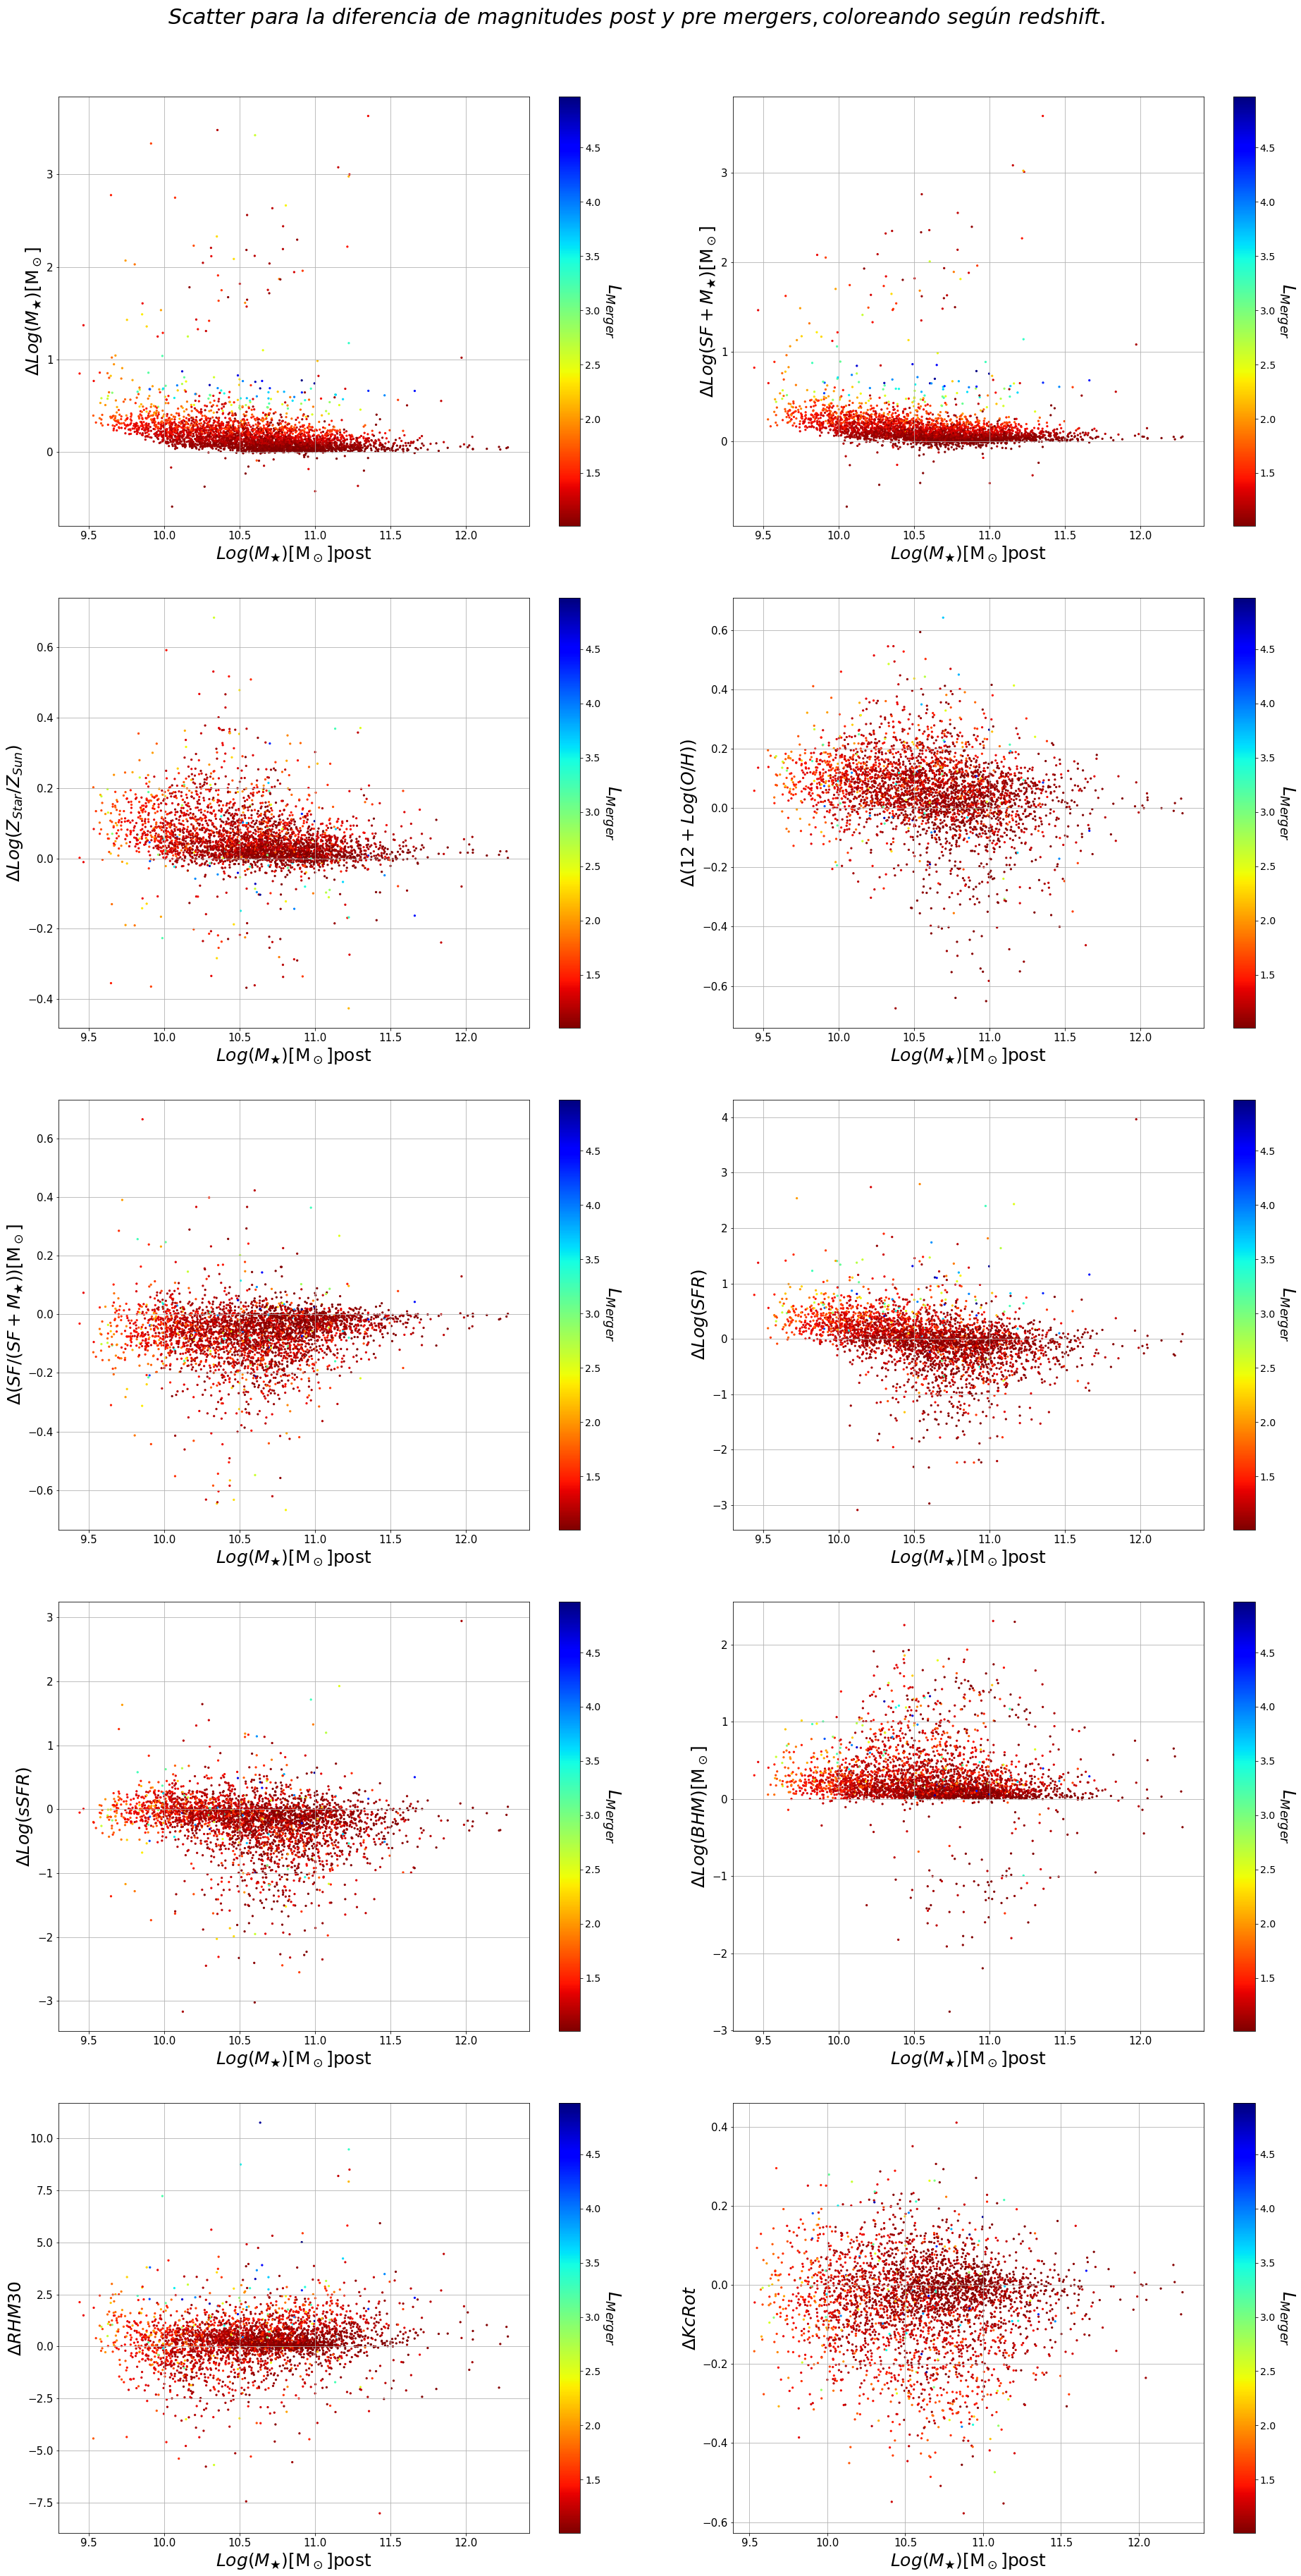

In [15]:
fig,ax = plt.subplots(5,2,figsize=(30,60))
ax = ax.flatten() # Convertimos a ax en una array plano para recorrerlo tranqui con un for 

fig.tight_layout(pad=10.0)

fontdict ={'fontsize': 30}

fig.suptitle(r'$Scatter\ para\ la\ diferencia\ de\ magnitudes\ post\ y\ pre\ mergers, coloreando\ según\ redshift.$', fontsize=30)

i=0
for varx,vary,labely,varz in zip(xvar,yvar,ylabels,zvar):

        #PARTE DE DEFINICIONES PARA COLOREAR
        # Colors representing some property  
        # Define colormap to use
        cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
        cmap.set_under('k')    # Color por debajo de mínimo

        # Propiedad a usar para colorear
        # Ojo!! Acá depende de la propiedad si tomar o no log10...
        # colors_var_key='Mass_Star'
        colors_var_label=r'$L_{Merger}$'
        colors_var=varz
                                   
        #---------------------------------------------------------------
        # Esto es en caso de que se tome log y la variable para colorear sea cero
        # En estos casos, se asigna el color negro (con el 'set_under' del principio)
        mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
        #---------------------------------------------------------------

        # Escaleo los colores "a mano". Es una escala lineal.
        vmin=min(colors_var[mask_color])
        vmax=max(colors_var[mask_color])
        a=1./float(vmax-vmin)
        b=-a*vmin
        colorss=(a*colors_var+b)   # Array de números que representan colores
        facecolor=cmap(colorss)    # Esto transforma "números" a 4-tuplas que representan colores
        
        
        # Scatter plot 'falso', para armar barra de referencia
        sc_bar=ax[i].scatter(varx,vary,c=colorss,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
        # Agrego barra de referencia para colres
        cbar=fig.colorbar(mappable=sc_bar,ax=ax[i],orientation='vertical')
        cbar.set_label(colors_var_label,fontsize=25,rotation=270,labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        
        #PARTE DE SCATTER
                        
        xlim=(min(varx),max(varx))
        ylim=(min(vary)-0.05*abs(min(vary)),max(vary)+0.05*abs(max(vary)))

        ax[i].set_xlabel(str(xlabels[0]),fontsize=25)
        ax[i].set_ylabel(str(labely),fontsize=25)

        ax[i].tick_params(axis='both', which='major', labelsize=15)
        
#         sizes = np.exp(tam)/1000
        
        # Scatter coloreado y dimensionado
        ax[i].scatter(varx,vary,marker='o',c=facecolor,s=5)
   
        plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

        ax[i].grid()
        i=i+1
# plt.savefig('/home/ramiro/Facultad/Tesis/Figuras/Actividad 10/scatter_postypremerger.png')
plt.show()

## Color maps

<ipython-input-16-72772ef97560>:64: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (var_color==[]) or (statistic=='counts'):
<ipython-input-16-72772ef97560>:134: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.
<ipython-input-16-72772ef97560>:153: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
<ipython-input-16-72772ef97560>:64: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (var_color==[]) or (statistic=='counts'):
<ipython-input

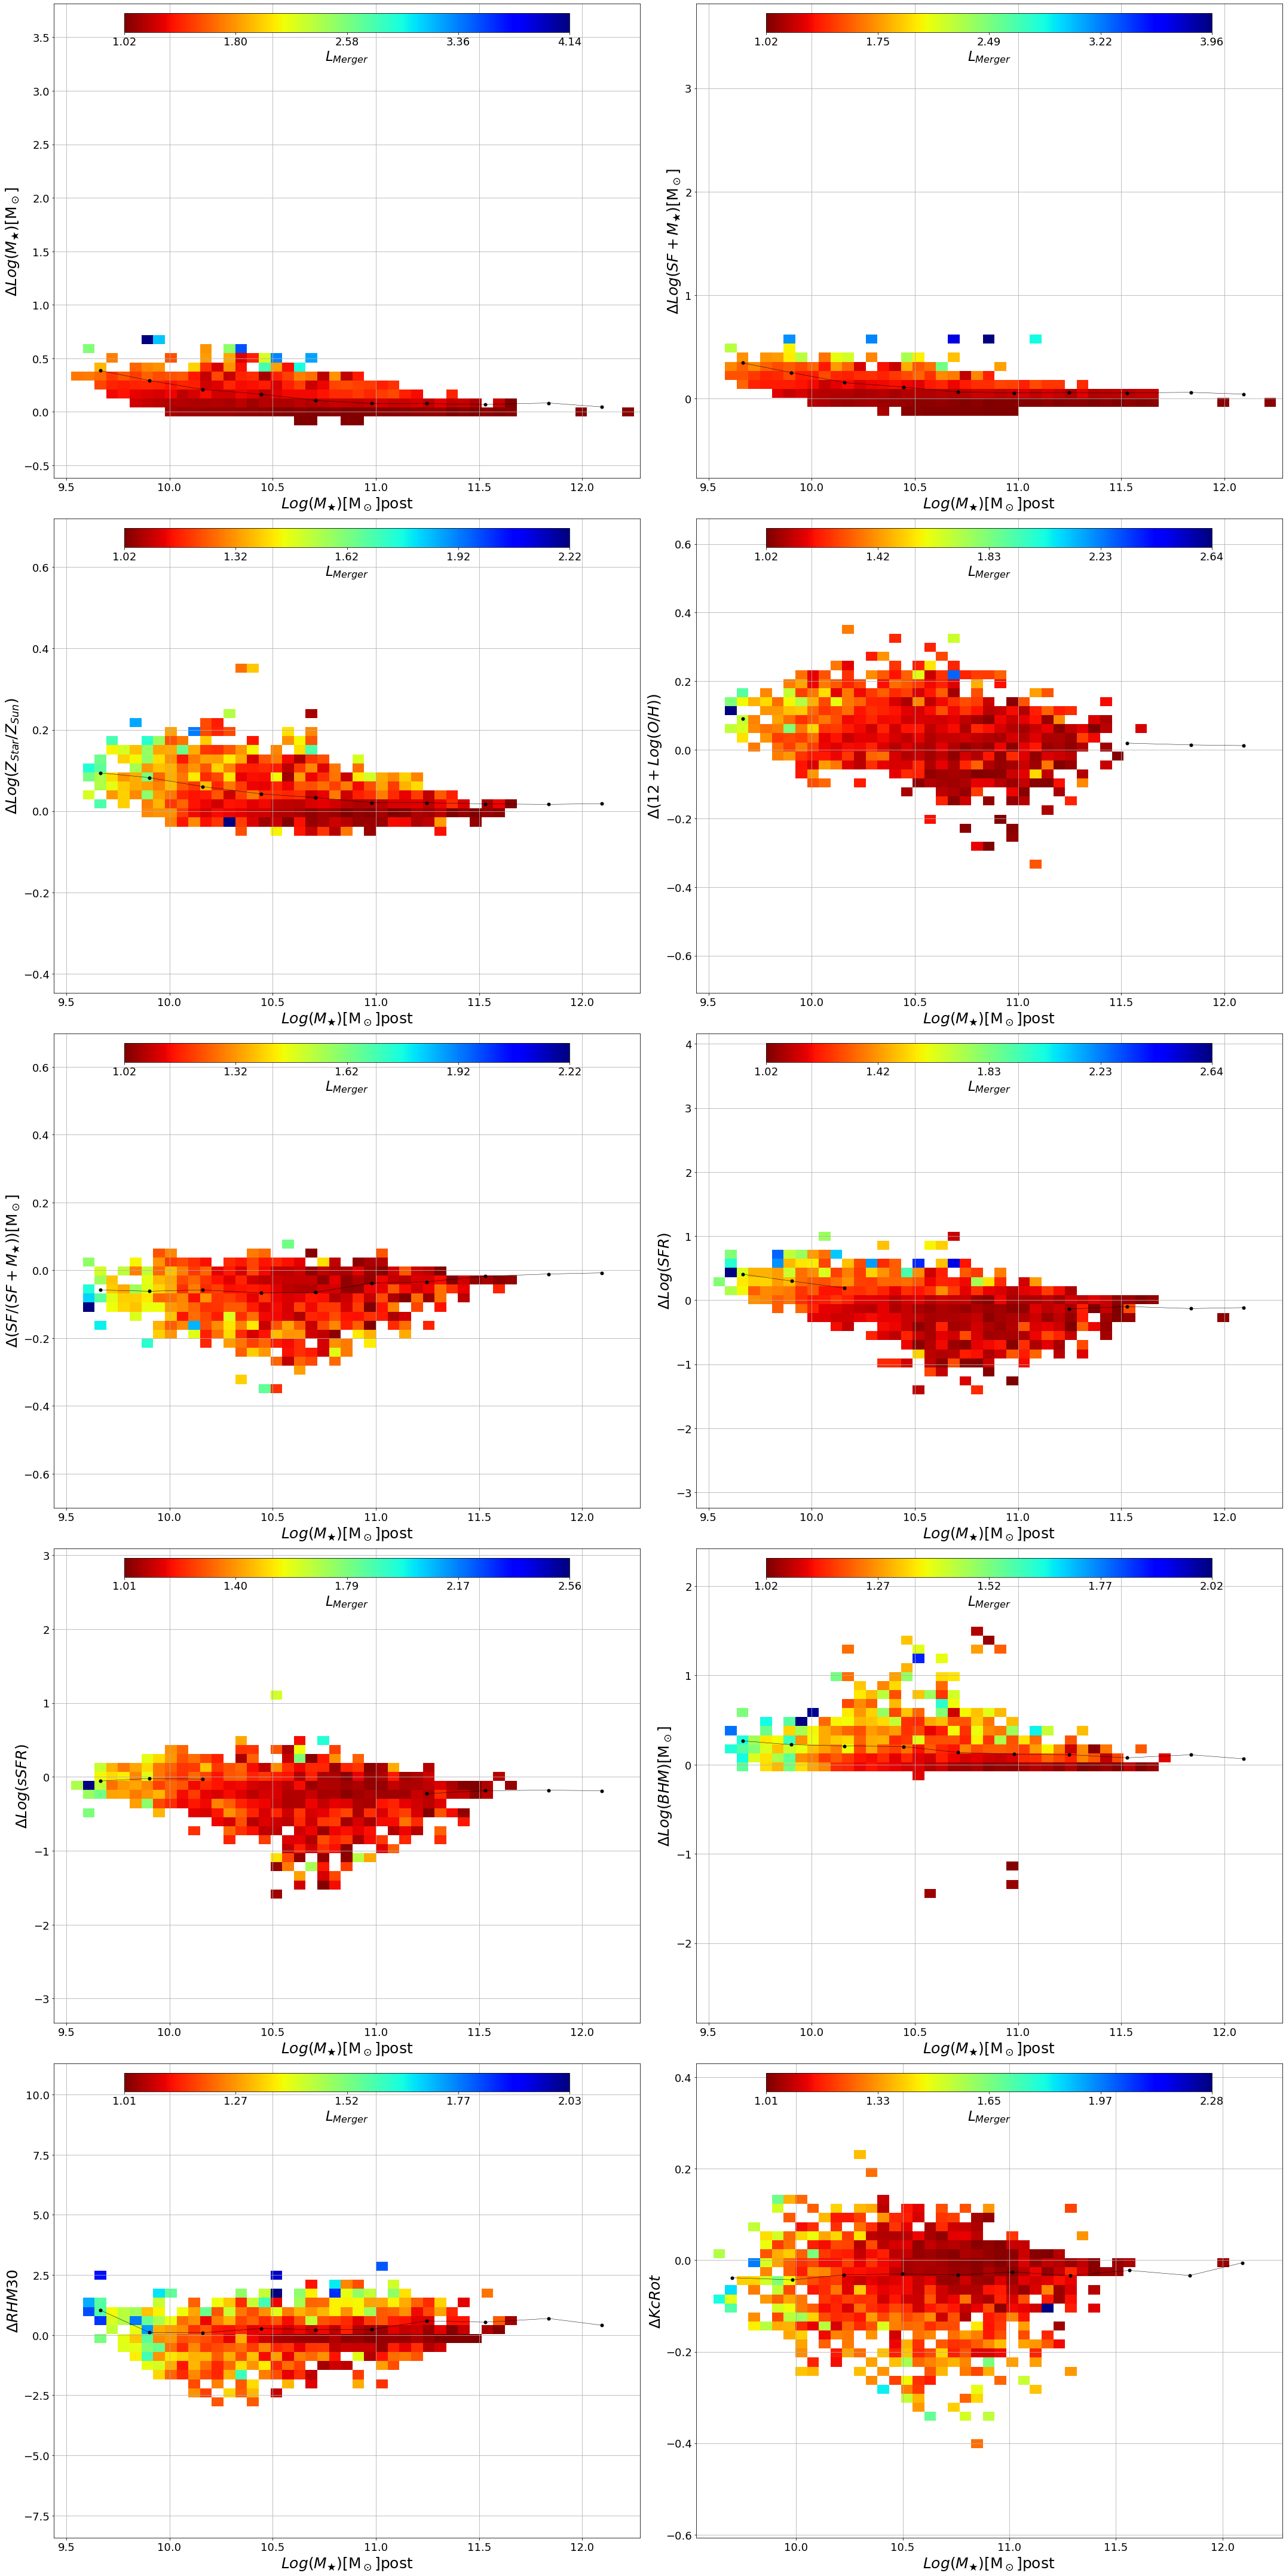

In [16]:
fig,ax = plt.subplots(5,2,figsize=(30,60))
ax = ax.flatten() # Convertimos a ax en una array plano para recorrerlo tranqui con un for 

fig.tight_layout(pad=10.0)

fontdict ={'fontsize': 30}

# fig.suptitle(r'$Scatter\ para\ la\ diferencia\ de\ magnitudes\ post\ y\ pre\ mergers, coloreando\ según\ redshift\ y\ tamaños\ según\ la\ masa\ pre\ merger.$', fontsize=30)

# Para el calculo de las medianas

nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=5         # Mínima cantidad de elementos para considerar en un bin

k=0
for varx,vary,labely,varz in zip(xvar,yvar,ylabels,zvar):

        # Parámetro que colorea
        parametro= varz

        # Variables (ejes) a graficar
        xplot = varx
        yplot = vary

        xlabel= xlabels[0]
        ylabel= labely

        xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xplot,yplot,bins=nbins,min_count=min_count,
                                                                     perc_low=perc_low,perc_high=perc_high)

        #-------------------- Variables para pintar grilla 2D-----------------------------------------------
        # Variable a usar para colorear
        var_color= parametro

        # Estadístico a usar ('counts','mean','median')
        statistic='median'

        # 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
        # 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.

        # Label to use in color bar reference
        var_label=r'$L_{Merger}$'

        # Número de bines en cada eje
        nbinsx=50
        nbinsy=50

        # Minimum number of galaxies to color bin (bins with less galaxies than this value will
        # not be taken into account)
        cmin=3

        # Color map to use. Use 'mapname_r' to invert colours. For example, if want to
        # invert the color map "jet", use "jet_r".
        cmap='jet_r'


        # Intervals of binning, as function of nbinsx and nbinsy:
        intx=(max(xplot)-min(xplot))/nbinsx
        inty=(max(yplot)-min(yplot))/nbinsy

        # If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
        if (var_color==[]) or (statistic=='counts'):   
            # Min and Max of each variable
            xmin,xmax=min(xplot),max(xplot)
            xlim=[xmin,xmax]

            ymin,ymax = min(yplot),max(yplot)
            ylim = [ymin,ymax]
        
            # Construct the 2D histogram
            hist2d,xedges,yedges,im=ax[k].hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                              range=(xlim,ylim),cmin=cmin)
            var_label='N'
        
         # If not want to plot a 2D histogram, construct the color map
        else:
         #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
                    density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                             # order to use 'meshgrid' later.

                    # Calculate the desired statistic in each bin
                    auxx=min(xplot)
                    for i in range(nbinsx+1):
                        auxy=min(yplot)
                        for j in range(nbinsy+1):
                            # Select data of elements that belong to the bin
                            var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                            # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                            if (var.size >=cmin):
                                if statistic=='mean':
                                    stat_val=np.mean(var)
                                elif statistic=='median':
                                    stat_val=np.median(var)                        
                            # If not enough elements in the bin, assign the value -1e99 to the statistic        
                            else:
                                stat_val=-1e99
                
                            # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                            density[j,i]=stat_val
                            auxy=auxy+inty
                        auxx=auxx+intx

                    # Define x-coordinates of 2D grid
                    x=np.zeros(nbinsx+1)
                    auxx=min(xplot)
                    for i in range(nbinsx+1):
                        x[i]=auxx
                        auxx=auxx+intx

                    # Define y-coordinates of 2D grid
                    y=np.zeros(nbinsy+1)
                    auxy=min(yplot)
                    for j in range(nbinsy+1):
                        y[j]=auxy
                        auxy=auxy+inty

                    # Construct two 2D array with grid coordinates
                    x,y=np.meshgrid(x,y)

                    # Define again the density (statistic) array
                    z=density

                    # IMPORTANT!!: x, y, z MUST have the same shape.

                    # Search min and max of statistic, considering only bins with "well-defined" statistic
                    densitylim=density[density > -1e99]
                    vmin=np.amin(densitylim)
                    vmax=np.amax(densitylim)
 
                    # Prepare the color map
                    cmap = plt.get_cmap(cmap)       # Name of the color map
                    cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
                    norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

                    # Construct color grid
                    im=ax[k].pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

        # Barra de referencia y "tuneo" del gráfico
        # Add an axis that will contain the color bar 
        cbaxes=ax[k].inset_axes([0.12,0.94,0.76,0.04]) 

        # Construct color bar using the color grid (object 'im')
        cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
        cbar.set_label(var_label,fontsize=23)    # Label of color bar
        cbaxes.tick_params(axis='both', which='major', labelsize=18)   # Size of ticks labels

        # Number of ticks in color bar
        loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
        cbar.locator=loc
        cbar.update_ticks()
        if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
            cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
        else:
            cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))

        # Ajustar cosas del gráfico
        ax[k].set_xlabel(str(xlabels[0]),fontsize=25)
        ax[k].set_ylabel(str(labely),fontsize=25)

        xmin,xmax=min(xplot),max(xplot)
#         xmin,xmax=1.01,3
        ax[k].set_xlim(xmin,xmax)


        ymin,ymax=min(yplot)-0.05*abs(min(yplot)),max(yplot)+0.05*abs(max(yplot))
#         ymin,ymax= -0.1,1
        ax[k].set_ylim(ymin,ymax)

        ax[k].tick_params(axis='both',labelsize=18)

        ax[k].plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Mediana')

#         ax[k].errorbar(xmedian,ymedian,yerr=yerror,
#                        c='k',marker='o',markersize=2,linestyle='-',
#                        linewidth=0.5,label='Percentiles 25% y 75%',capsize=5,capthick=1.5)

        # leg1 = ax.legend(edgecolor='0.1',loc='lower right',handlelength=4,fontsize=15)
        # leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':15})

        # ax.add_artist(leg1)

        fig.tight_layout()

        ax[k].grid()
        k = k+1                                                      

# Guardar la figura, si es necesario
# plt.savefig('/home/ramiro/Facultad/Tesis/Figuras/Actividad 10/colormap_postypremerger.png')
    
plt.show()

In [16]:
# Fin